## Importing libraries


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 


from sklearn.model_selection import train_test_split

import numpy as np

from scipy import stats


from sklearn import metrics
from sklearn.impute import SimpleImputer 

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


## Reading data 

In [2]:
my_data = pd.read_csv("C:/Users/ASUS/Documents/Course documents/Sem 3/ADMN 5016/Bank_Personal_Loan_Modelling.csv")
my_data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","Personal_Loan","SecuritiesAccount","CDAccount","Online","CreditCard"]


## Data Analysis

In [3]:
my_data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


### Shape of the data

In [4]:
my_data.shape

(5000, 14)

There are 5000 customers.

In [5]:
my_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

### Data type of each attribute 

In [6]:
my_data.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
Personal_Loan          int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

Almost all atributes are numeric. 

## Checking null values 

In [7]:
my_data.isnull().values.any()

False

## Summary


In [9]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   Personal_Loan      5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Finding unique data 

In [11]:
my_data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [12]:
my_data.shape

(5000, 14)

## Cleaning

In [13]:
my_data[my_data['Experience'] < 0]['Experience'].count()

52

In [14]:
my_dataExp = my_data.loc[my_data['Experience'] >0]
negExp = my_data.Experience < 0
column_name = 'Experience'
my_data_list = my_data.loc[negExp]['ID'].tolist()

In [15]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [16]:
for id in my_data_list:
    age = my_data.loc[np.where(my_data['ID']==id)]["Age"].tolist()[0]
    education = my_data.loc[np.where(my_data['ID']==id)]["Education"].tolist()[0]
    df_filtered = my_dataExp[(my_dataExp.Age == age) & (my_dataExp.Education == education)]
    exp = df_filtered['Experience'].median()
    my_data.loc[my_data.loc[np.where(my_data['ID']==id)].index, 'Experience'] = exp
    

In [17]:
my_data[my_data['Experience'] < 0]['Experience'].count()

0

In [18]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Boxplot 

<AxesSubplot:xlabel='Age'>

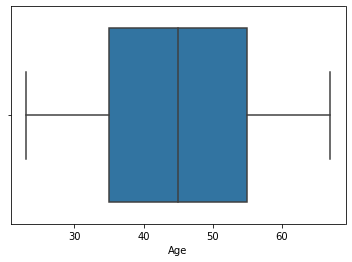

In [19]:
sns.boxplot(x=my_data["Age"])

<AxesSubplot:xlabel='Experience'>

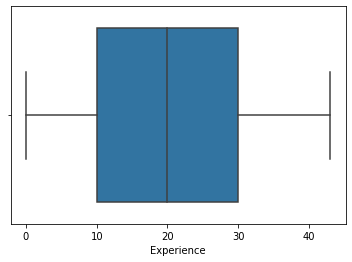

In [20]:
sns.boxplot(x=my_data["Experience"])

<AxesSubplot:xlabel='Income'>

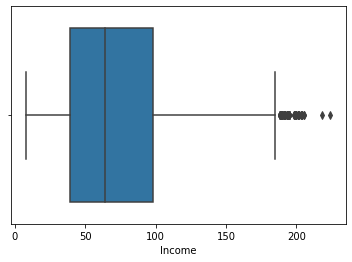

In [21]:
sns.boxplot(x=my_data["Income"])

<AxesSubplot:xlabel='Education', ylabel='Income'>

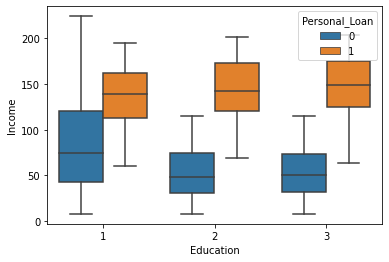

In [22]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=my_data)

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

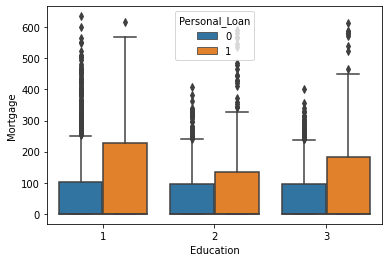

In [23]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=my_data)

<AxesSubplot:xlabel='Family', ylabel='Income'>

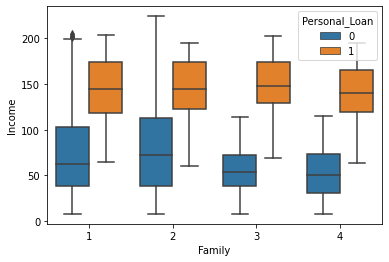

In [24]:
sns.boxplot(x="Family",y="Income",hue="Personal_Loan",data=my_data)

# CountPlot

<AxesSubplot:xlabel='Family', ylabel='count'>

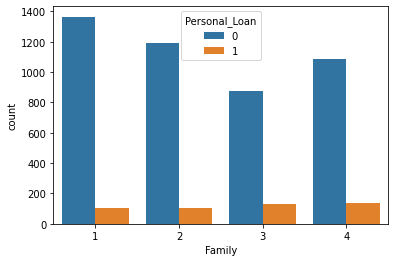

In [25]:
sns.countplot(x='Family',data=my_data,hue='Personal_Loan')

<AxesSubplot:xlabel='SecuritiesAccount', ylabel='count'>

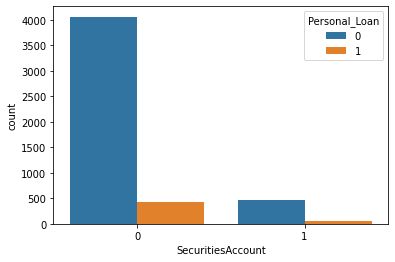

In [26]:
sns.countplot(x="SecuritiesAccount", data=my_data,hue="Personal_Loan")

<AxesSubplot:xlabel='CDAccount', ylabel='count'>

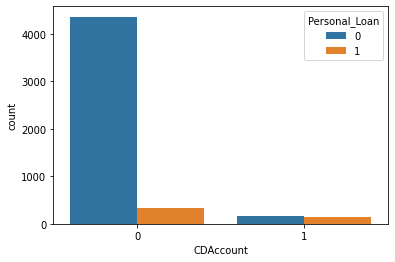

In [27]:
sns.countplot(x='CDAccount',data=my_data,hue='Personal_Loan')

<AxesSubplot:xlabel='Online', ylabel='count'>

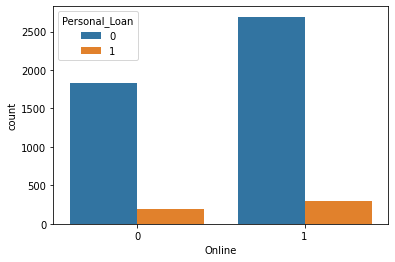

In [28]:
sns.countplot(x='Online',data=my_data,hue='Personal_Loan')

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

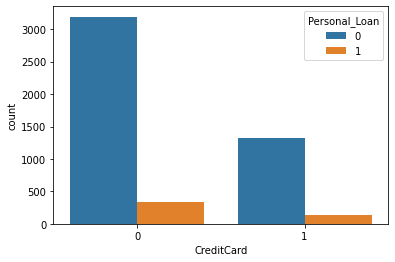

In [29]:
sns.countplot(x='CreditCard',data=my_data,hue='Personal_Loan')

# Distribution Plot

C:\Users\ASUS\anaconda3\envs\streamlit\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

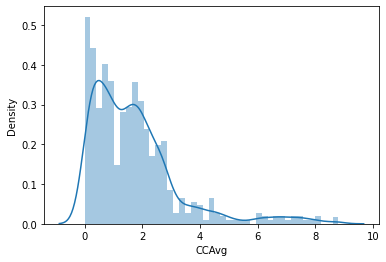

In [30]:
sns.distplot( my_data[my_data.Personal_Loan == 0]['CCAvg'])

C:\Users\ASUS\anaconda3\envs\streamlit\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

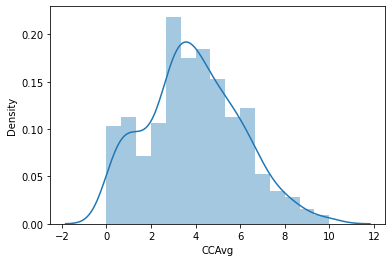

In [31]:
sns.distplot( my_data[my_data.Personal_Loan == 1]['CCAvg'])

# Correlation matrix

In [32]:
cor=my_data.corr()
cor

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,-0.011498,0.001059,0.007381,0.014501,0.007935
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.011498,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


## Logistic Regression

In [33]:
data=my_data.drop(['ID','ZIPCode','Experience'], axis =1 )
data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Income             5000 non-null   int64  
 2   Family             5000 non-null   int64  
 3   CCAvg              5000 non-null   float64
 4   Education          5000 non-null   int64  
 5   Mortgage           5000 non-null   int64  
 6   Personal_Loan      5000 non-null   int64  
 7   SecuritiesAccount  5000 non-null   int64  
 8   CDAccount          5000 non-null   int64  
 9   Online             5000 non-null   int64  
 10  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [35]:
data1=data[['Age','Income','Family','CCAvg','Education','Mortgage','SecuritiesAccount','CDAccount','Online','CreditCard','Personal_Loan']]

In [36]:
data1.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Personal_Loan
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0
5,37,29,4,0.4,2,155,0,0,1,0,0
6,53,72,2,1.5,2,0,0,0,1,0,0
7,50,22,1,0.3,3,0,0,0,0,1,0
8,35,81,3,0.6,2,104,0,0,1,0,0
9,34,180,1,8.9,3,0,0,0,0,0,1


In [37]:
data1.shape

(5000, 11)

In [38]:
data1["Personal_Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [39]:
array = data1.values
X = array[:,0:9] 
Y = array[:,10]   
test_size = 0.30 
seed = 15  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 
type(X_train)

numpy.ndarray

In [40]:

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('Accuracy:',model_score)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=model_score  

Accuracy: 0.9413333333333334
confusion_matrix:
[[1332   29]
 [  59   80]]


C:\Users\ASUS\anaconda3\envs\streamlit\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Naive Bayes

In [41]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [42]:
X = data1.values[:,0:9]  
Y = data1.values[:,10]  

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [44]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [45]:
Y_pred = clf.predict(X_test)

In [46]:
B=accuracy_score(Y_test, Y_pred, normalize = True) 
print('Accuracy_score:',B)

Accuracy_score: 0.8793333333333333


In [47]:

print(recall_score(Y_test, Y_pred))

0.5942028985507246


In [48]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix:
[[1237  125]
 [  56   82]]


# 13.Comparison of different  Models:

In [49]:
print(A)

0.9413333333333334


In [50]:
print(B) 

0.8793333333333333
